<a href="https://colab.research.google.com/github/JamshedAli18/-Natural-Language-Processing-NLP-/blob/main/Text%20Representation/BoW_TfIDf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("imdb.csv")

In [ ]:
df.head()

,review,sentiment
0,i really liked this summerslam due to the look...,positive
1,not many television shows appeal to quite as m...,positive
2,the film quickly gets to a major chase scene w...,negative
3,jane austen would definitely approve of this o...,positive
4,expectations were somewhat high for me when i ...,negative


In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
negative,524
positive,476


In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [ ]:
from nltk.corpus import stopwords

sw_list = stopwords.words('english')

df['review'] = df['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

In [ ]:
df.head()

,review,sentiment
0,really liked summerslam due look arena curtain...,positive
1,many television shows appeal quite many differ...,positive
2,film quickly gets major chase scene ever incre...,negative
3,jane austen would definitely approve onegwynet...,positive
4,expectations somewhat high went see movie thou...,negative


In [ ]:
x = df['review']
y = df['sentiment']

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [ ]:
y

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
X_train.shape

(800,)

In [ ]:
type(X_train)

pandas.core.series.Series

# Applying Bag of words (BOW)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()

In [ ]:
X_train_bow = cv.fit_transform(X_train).toarray()
X_test_bow = cv.transform(X_test).toarray()



In [ ]:
X_train_bow.shape

(800, 18591)

In [ ]:
X_test_bow.shape

(200, 18591)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train_bow,y_train)

GaussianNB()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
y_pred = gnb.predict(X_test_bow)

In [ ]:
accuracy_score(y_pred,y_test)

0.61

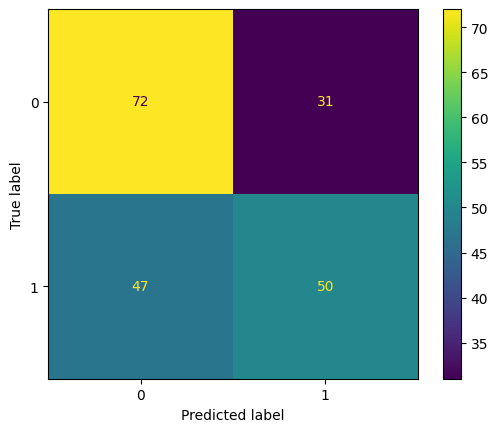

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train_bow,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test_bow)

In [ ]:
accuracy_score(y_pred,y_test)

0.76

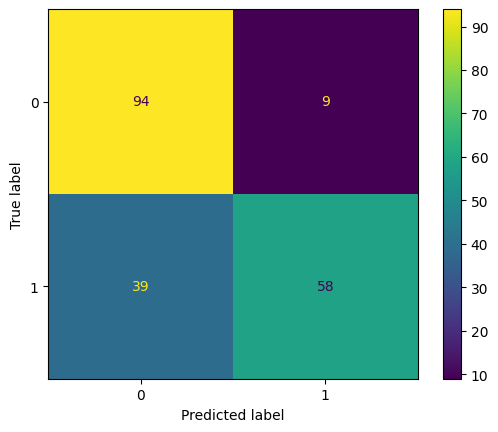

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
cv = CountVectorizer(max_features=300)

X_train_bow = cv.fit_transform(X_train).toarray()
X_test_bow = cv.transform(X_test).toarray()

rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)

RandomForestClassifier()

In [ ]:
rf.fit(X_train_bow,y_train)

accuracy_score(y_pred,y_test)


0.76

# Applying N_grams

In [ ]:
cv = CountVectorizer(ngram_range=(2,2))

X_train_bow = cv.fit_transform(X_train).toarray()
X_test_bow = cv.transform(X_test).toarray()

rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test_bow)

accuracy_score(y_pred,y_test)


0.55

# Applying TDF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tdf = TfidfVectorizer()

In [ ]:
X_train_tdf = cv.fit_transform(X_train).toarray()
X_test_tdf = cv.transform(X_test).toarray()

In [ ]:
rf = RandomForestClassifier()

rf.fit(X_train_tdf,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test_tdf)

accuracy_score(y_pred,y_test)


0.56